In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set chart style
sns.set_theme(style="whitegrid")

def load_and_compare_models(model_files: dict):
    """
    Loads CSV files and creates a single DataFrame for comparison.
    
    Args:
        model_files: Dictionary { 'Model Name': 'path/to/report.csv' }
    """
    df_list = []
    
    for model_name, file_path in model_files.items():
        if not os.path.exists(file_path):
            print(f"Warning: File not found for {model_name} -> {file_path}")
            continue
            
        df = pd.read_csv(file_path)
        df['Model'] = model_name  # Add column with model name
        df_list.append(df)
    
    if not df_list:
        raise ValueError("No files loaded successfully.")
        
    full_df = pd.concat(df_list, ignore_index=True)
    return full_df

def plot_leaderboard(df, metric='ADD-0.1d Accuracy (%)', ascending=False):
    """
    Summary plot: average of the chosen metric across all objects.
    """
    # Calculate mean for each model
    leaderboard = df.groupby('Model')[metric].mean().reset_index()
    # Sort: True if metric is error (lower is better), False if accuracy (higher is better)
    leaderboard = leaderboard.sort_values(by=metric, ascending=not ascending) 
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=leaderboard, x='Model', y=metric, hue='Model', palette='viridis', legend=False)
    
    # Add values on top of bars
    for i in ax.containers:
        ax.bar_label(i, fmt='%.2f', padding=3)
        
    plt.title(f"Global Comparison: {metric} (Mean across all objects)")
    plt.ylabel("Mean Value")
    plt.ylim(0, 105 if 'Accuracy' in metric else None)
    plt.tight_layout()
    plt.show()
    
    return leaderboard

def plot_per_object_comparison(df, metric='ADD-0.1d Accuracy (%)'):
    """
    Detailed plot: comparison for each individual object.
    """
    plt.figure(figsize=(14, 6))
    
    # Grouped bar chart
    sns.barplot(
        data=df, 
        x='Object Name', 
        y=metric, 
        hue='Model', 
        palette='magma',
        edgecolor='black'
    )
    
    plt.title(f"Per-Object Detail: {metric}")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model')
    
    # If metric is accuracy, fix limit to 100
    if 'Accuracy' in metric:
        plt.ylim(0, 105)
        plt.axhline(100, color='gray', linestyle='--', alpha=0.5)
        
    plt.tight_layout()
    plt.show()

def get_comparison_tables(df):
    """
    1. Filters relevant columns
    2. Groups by Model and computes mean
    3. Sorts by ADD-0.1d Accuracy descending
    4. Renames columns for LaTeX clarity
    5. Outputs LaTeX table code
    6. Returns the summary DataFrame
    """
    
    # 1. Filter relevant columns
    cols_to_keep = [
        'Mean ADD (mm)', 
        'ADD-0.1d Accuracy (%)', 
        'ADD-S-0.1d Accuracy (%)'
    ]
    
    # Keep only existing columns
    actual_cols = [c for c in cols_to_keep if c in df.columns]
    
    # 2. Group by Model e compute mean
    summary_df = df.groupby('Model')[actual_cols].mean().reset_index()
    
    # 3. Sort by ADD-0.1d Accuracy descending
    if 'ADD-0.1d Accuracy (%)' in summary_df.columns:
        summary_df = summary_df.sort_values(by='ADD-0.1d Accuracy (%)', ascending=False)
    
    # 4. Renaming for LaTeX clarity
    latex_df = summary_df.copy()
    rename_map = {
        'ADD-0.1d Accuracy (%)': 'ADD-0.1d Acc (%)',
        'ADD-S-0.1d Accuracy (%)': 'ADD-S-0.1d Acc (%)'
    }
    latex_df = latex_df.rename(columns=rename_map)
    
    # 5. LaTeX output
    # print("\n" + "="*50)
    # print("CODICE LATEX")
    # print("="*50)
    
    # latex_code = latex_df.to_latex(
    #     index=False,
    #     float_format="%.2f",
    #     caption="Comparison of 6D Pose Estimation Models",
    #     label="tab:model_comparison",
    #     column_format="l" + "c" * (len(latex_df.columns) - 1)
    # )
    # print(latex_code)
    # print("="*50 + "\n")

    # 6. Return the summary DataFrame
    return summary_df


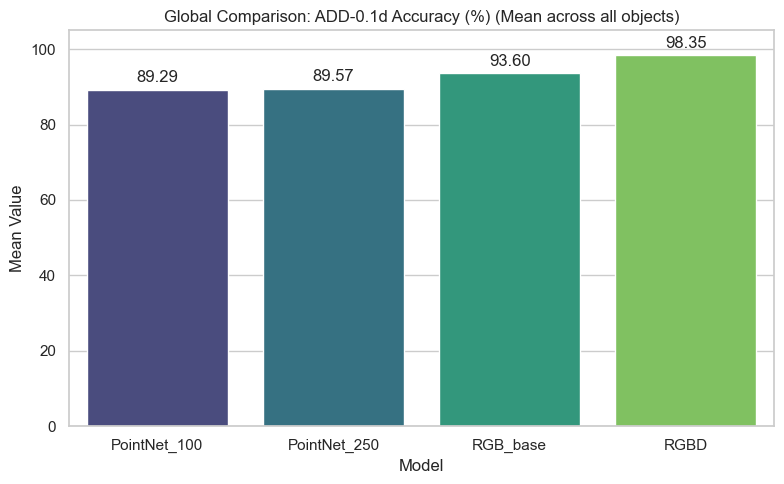

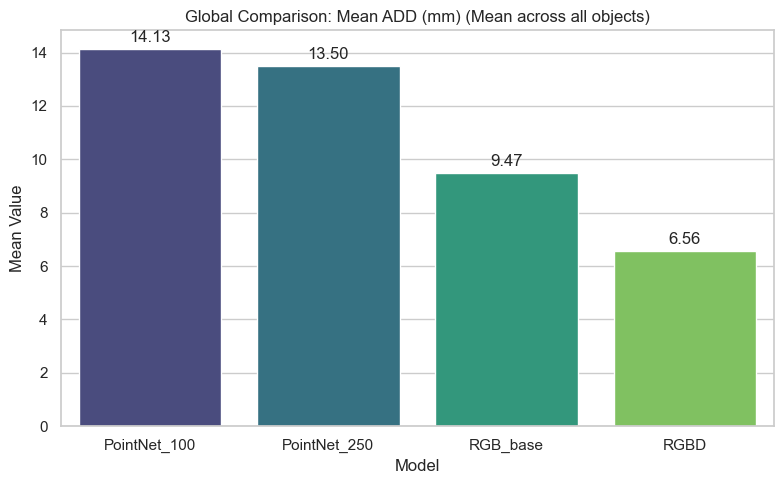

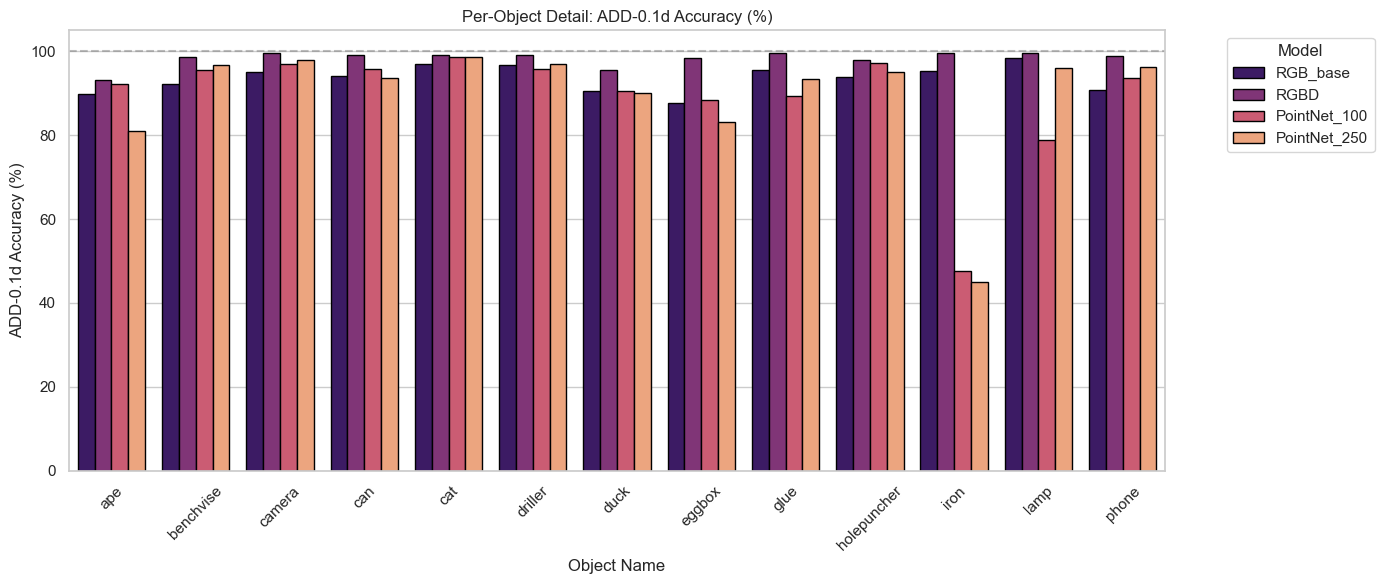

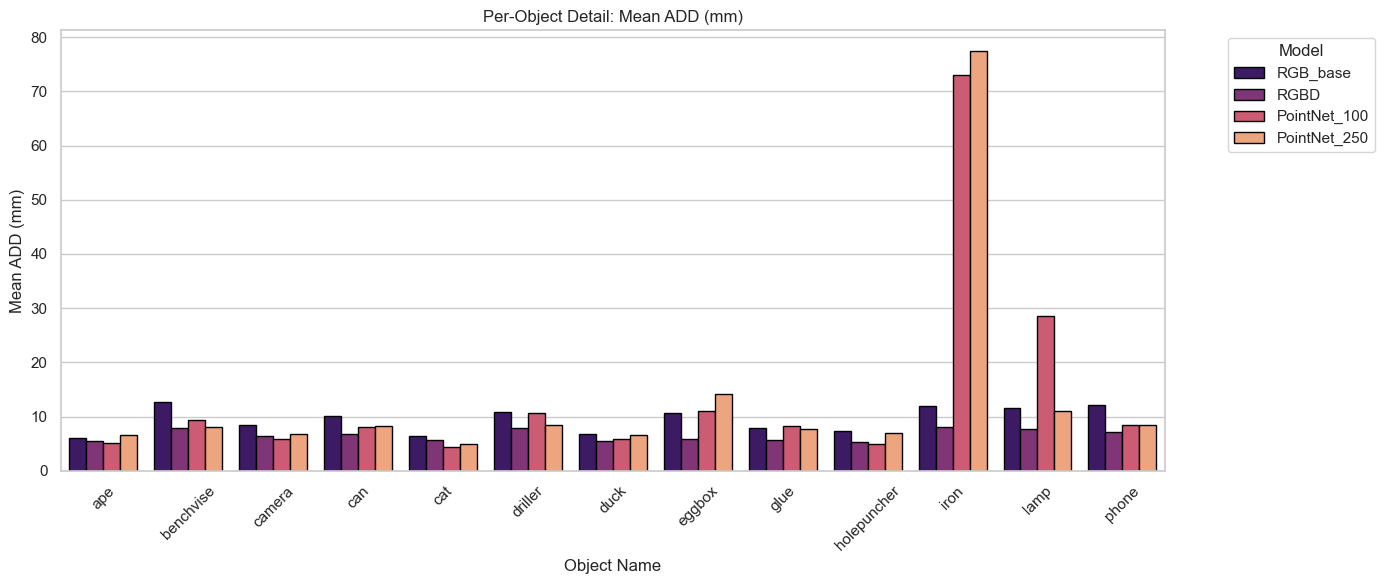

,Model,Mean ADD (mm),ADD-0.1d Accuracy (%),ADD-S-0.1d Accuracy (%)
2,RGBD,6.562004,98.347677,100.000000
3,RGB_base,9.473621,93.600699,99.938336
1,PointNet_250,13.498667,89.574768,99.874746
0,PointNet_100,14.125158,89.286857,99.776630


In [17]:
# Load data
files = {
    'RGB_base': './models_reports/rgb_final.csv',
    'RGBD': './models_reports/rgbd_final.csv',
    'PointNet_100': './models_reports/pointnet_100.csv',
    'PointNet_250': './models_reports/pointnet_250.csv',
}
full_df = load_and_compare_models(files)

# -------------------------------------------------------

# Run visualizations

# A. Global Leaderboard (Accuracy - Higher is better)
leaderboard = plot_leaderboard(full_df, metric='ADD-0.1d Accuracy (%)', ascending=False)

# B. Global Leaderboard (Errore ADD - Lower is better)
plot_leaderboard(full_df, metric='Mean ADD (mm)', ascending=True)

# C. Fine grained per object comparison (Accuracy)
plot_per_object_comparison(full_df, metric='ADD-0.1d Accuracy (%)')

# D. Fine grained per object comparison (Mean ADD)
plot_per_object_comparison(full_df, metric='Mean ADD (mm)')

# E. Generate comparison tables
get_comparison_tables(full_df)

